# Аналитика в авиакомпании

## 4. Исследовательский анализ

/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:

- model — модели самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:
- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

In [1]:
#импорт библиотек
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import math  
from scipy import stats as st  
import numpy as np 
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

import plotly.graph_objects as go

In [2]:
model_flights = pd.read_csv('/datasets/query_1.csv')

In [3]:
model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
model_flights.sort_values(by='flights_amount', ascending=False)

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


In [5]:
city_flights = pd.read_csv('/datasets/query_3.csv')

In [6]:
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [19]:
cf= city_flights.sort_values(by='average_flights', ascending=True)

,city,average_flights
8,Благовещенск,1.0
1,Анадырь,1.0
31,Комсомольск-на-Амуре,1.0
76,Стрежевой,1.0
49,Нефтеюганск,1.0
65,Петропавловск-Камчатский,1.0
88,Усть-Кут,1.0
22,Ижевск,1.0
9,Братск,1.0
21,Иваново,1.0


In [22]:
x = cf['average_flights'].round(2)
y = cf['city']

fig = go.Figure()
fig.add_trace(go.Bar(
            x=x, y=y,
            text=x,
            textposition='auto',
            marker_color='#D626FF',
            orientation = 'h'
                ))

fig.update_layout(
    template="plotly_white",
    title='<b>Данные по среднему количеству рейсов в день по городам<b>',
    xaxis=dict(
    title='<b>Среднее кол-во вылетов в день<b>'),
    width=950, 
    height=2000
   
    
)
fig.show()

Москва - крупнейший авиационый узел в России. Среднее количество рейсов в день в сентябре 2018 года - 129,77. Почти в три раза меньше в Санкт-Петербурге. Третьим в списке идет Новосибирск. Еще семь городов (Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск), входящие в ТОП-10, имеют схожие показатели относительно друг друга. 

In [9]:
model_flights.sort_values(by='flights_amount', ascending=False)

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


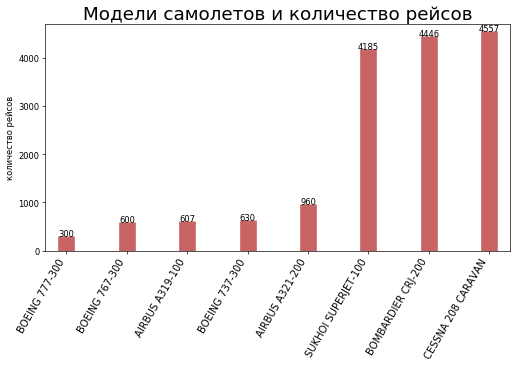

In [10]:
# подготовка данных
model_flights.sort_values('flights_amount', inplace=True)
model_flights.reset_index(inplace=True)

# строим график
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10,5), facecolor='white', dpi= 60)
ax.vlines(x=model_flights.index, ymin=0, ymax=model_flights.flights_amount, color='firebrick', alpha=0.7, linewidth=20)

# аннотация
for i, flights_amount in enumerate(model_flights.flights_amount):
    ax.text(i, flights_amount+0.5, round(flights_amount, 1), horizontalalignment='center')

# подписываем график и уст-м размер
ax.set_title('Модели самолетов и количество рейсов', fontdict={'size':22})
ax.set(ylabel='количество рейсов', ylim=(0, 4700))
plt.xticks(model_flights.index, model_flights.model.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

plt.show()

По количеству рейсов, совершенных в сентябре 2018 года, выделяются три модели самолетов: 
- "Cessna 208 Caravan"- лёгкий одномоторный самолет, используемый на авиалиниях малой протяжённости (4557 рейсов),
- "Bombardier CRJ-200" - среднемагистральный пассажирский самолет (4446 рейсов),
- "Sukhoi SuperJet-100"	- ближнемагистральный пассажирский самолёт (4185 рейсов)

Рейсов, совершенных самолетами компаний "Airbus" и "Boeing", в несколько раз меньше.

## 4. Вывод

Москва - крупнейший авиационый узел в России. Среднее количество рейсов в день в сентябре 2018 года - 129,77. Почти в три раза меньше в Санкт-Петербурге (31.16 рейса). Третьим в списке идет Новосибирск (17.32 рейса). Средние значение остальных семи городов (Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск), входящие в ТОП-10, находятся в диапазоне от 9,58 до 11,58. 

По количеству рейсов, совершенных в сентябре 2018 года, выделяются три модели: 
- "Cessna 208 Caravan"- лёгкий одномоторный самолет, используемый на авиалиниях малой протяжённости (4557 рейсов),
- "Bombardier CRJ-200" - среднемагистральный пассажирский самолет (4446 рейсов),
- "Sukhoi SuperJet-100"	- ближнемагистральный пассажирский самолёт (4185 рейсов)

Рейсов, совершенных самолетами компаний "Airbus" и "Boeing", в несколько раз меньше.

## 5. Проверка гипотез

/datasets/query_last.csv — результат последнего запроса. В нём следующая информация:

- week_number — номер недели;
- ticket_amount — количество проданных билетов за неделю;
- festival_week — есть ли на этой неделе фестиваль;
- festival_name — название фестиваля.

In [11]:
df = pd.read_csv('/datasets/query_last.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [13]:
df

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [14]:
alpha = 0.05
a = df[~df['festival_name'].isnull()]['ticket_amount']
b = df[df['festival_name'].isnull()]['ticket_amount']
results =  st.ttest_ind(a, b) #проверка гипотезы о равенстве средних двух независимых совокупностей
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print(results.statistic, results.pvalue)
stde1 = np.std(a) / (len(a))**0.5
print('Среднее', a.mean(), 'Нижняя граница', a.mean()-stde1, 'Верхняя граница', a.mean()+stde1)
stde2 = np.std(b) / (len(a))**0.5
print('Среднее', b.mean(), 'Нижняя граница', b.mean()-stde2, 'Верхняя граница', b.mean()+stde2)

Не получилось отвергнуть нулевую гипотезу
-1.8801129464020327 0.09688869045922928
Среднее 48662.666666666664 Нижняя граница 46581.12357808319 Верхняя граница 50744.20975525014
Среднее 51530.857142857145 Нижняя граница 51460.870458020516 Верхняя граница 51600.843827693774


## 5. Вывод

В результате применения Т-теста подтвердилась гипотеза: «средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Фестивали не оказывают существенного влияния на спрос на авиабилеты.

## Общий вывод

Среднее количество рейсов в Москве за день в сентябре 2018 года составило 129,77. Почти в три раза меньше в Санкт-Петербурге (31.16 рейса). Третьим в списке идет Новосибирск (17.32 рейса). Средние значение остальных семи городов (Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск), входящие в ТОП-10, находятся в диапазоне от 9,58 до 11,58. 

По количеству рейсов, совершенных в сентябре 2018 года, выделяются три модели: 
- "Cessna 208 Caravan"- лёгкий одномоторный самолет, используемый на авиалиниях малой протяжённости (4557 рейсов),
- "Bombardier CRJ-200" - среднемагистральный пассажирский самолет (4446 рейсов),
- "Sukhoi SuperJet-100"	- ближнемагистральный пассажирский самолёт (4185 рейсов)

Рейсов, совершенных самолетами компаний "Airbus" и "Boeing", в несколько раз меньше.

В результате применения Т-теста подтвердилась гипотеза: «средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Фестивали не оказывают существенного влияния на спрос на авиабилеты.